In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
#installing dependencies
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip -q install pyvirtualdisplay
!pip -q install pyglet
!pip -q install gym
!apt-get -qq -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1 > /dev/null
!pip -q install pyopengl
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!apt-get install x11-utils

E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 209 kB of archives.
After this operation, 711 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Fetched 209 kB in 1s (229 kB/s)
Selecting previously unselected package libxxf86dga

In [3]:
import gym
from collections import deque
import numpy as np
import random
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from google.colab import files
import os
import matplotlib.animation
from keras import backend as K
from keras.models import load_model
from IPython.display import HTML
from keras.layers import Dense, Activation, Lambda, Input, concatenate, Add

Using TensorFlow backend.


In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
restore_file_path = "gdrive/My Drive/Colab Notebooks/cartpole_duel_dqn_final_20.h5"

In [7]:
env = gym.make("CartPole-v0")
model = load_model(restore_file_path)
state = env.reset()
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
episode_number=0
frames = []
num_test_episodes=1

while(episode_number < num_test_episodes):
    state = env.reset()
    done=False
    state = np.reshape(state, [1, state_size])
    episode_rew = 0
    while(not done):
        frames.append(env.render(mode = 'rgb_array'))
        act_values = model.predict(state)
        action=np.argmax(act_values[0])  # returns action
        observe, reward, done, info = env.step(action)
        state=np.reshape(observe, [1, state_size])
        episode_rew += reward
    episode_number+=1
    print("Episode reward", episode_rew)












Episode reward 200.0


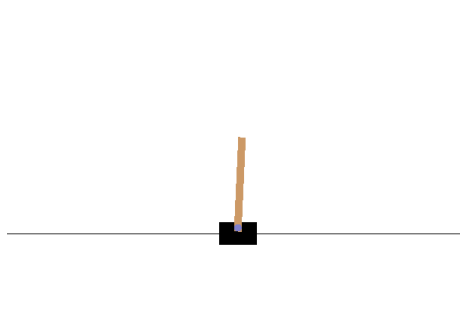

In [9]:
env.render()
plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml()) 
Writer = matplotlib.animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('/content/gdrive/My Drive/Colab Notebooks/Cartpole_duel_dqn.mp4', writer=writer)